In [52]:
import numpy as np

a) Diagrama de cuerpo libre y cálculo de las fuerzas
b) Se tienen que resolver 8 ODEs, son 4 por cada partícula.

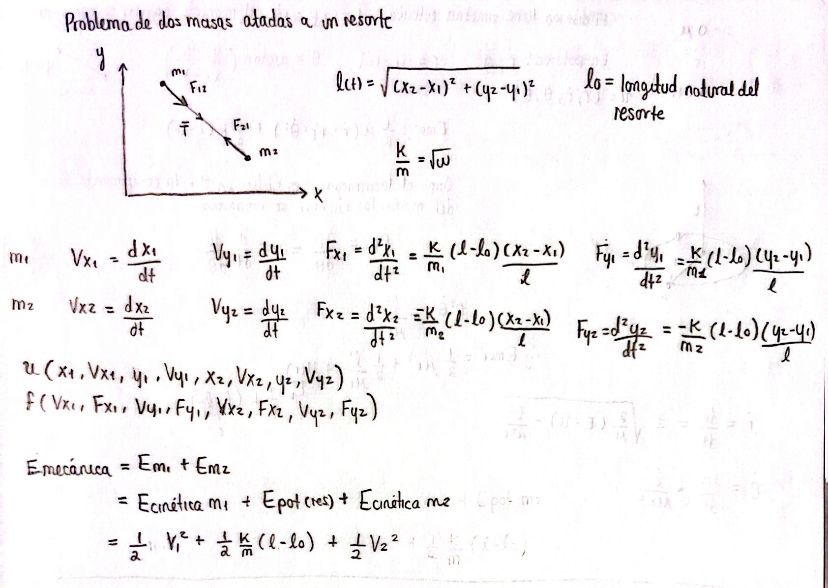

c) Los parámetros del sistema son omega y la longitud natural (l0)

In [53]:
#condiciones iniciales 
x0_1=0.7
y0_1=0
x0_2=-0.7
y0_2=0

v0x_1=3
v0y_1=0.1
v0x_2=0
v0y_2=-0.1

#arreglo que contenga las condiciones iniciales
u0 = np.array([x0_1,v0x_1,y0_1,v0y_1,x0_2,v0x_2,y0_2,v0y_2])

#parametros del sistema resorte
w = 1
l0 = 1

#arreglo que contenga el tiempo con un deltat (h)
tstop = 20
h = 1/100
t=np.arange(0.,tstop+h,h)

d) Función que calcula el arreglo f para el resorte

In [54]:
#funcion que contiene las fuerzas del resorte
def resorte(u,t,w,l0):
    #l es la longitud del resorte en un t
    l=np.sqrt((u[4]-u[0])**2+(u[6]-u[2])**2)
    deriv = np.array([u[1],(w**2)*(l-l0)*(u[4]-u[0])/l,u[3],(w**2)*(l-l0)*(u[6]-u[2])/l,u[5],-(w**2)*(l-l0)*(u[4]-u[0])/l,u[7],-(w**2)*(l-l0)*(u[6]-u[2])/l])
    return deriv

e) Solución numérica del problema utilizando Runge- Kutta 4to orden


In [55]:
#nuestro método de solución de la ODE será el metódo de Runge-Kutta de cuarto orden
def runge_kutta_4to(f_user, u0, t, *args):

    n = t.size
    neq = u0.size
    u = np.zeros((n, neq))

    u[0] = u0
    
    dt = t[1]-t[0]
    
    for i in range(n-1):
        k1 = f_user(u[i], t[i],*args)
        k2 = f_user(u[i]+(1/2)*k1*dt, t[i+1]+ (1/2)*dt,*args )
        k3 = f_user(u[i]+(1/2)*k2*dt, t[i+1]+ (1/2)*dt,*args )
        k4 = f_user(u[i]+ k3*dt, t[i+1]+ dt,*args)
        u[i+1] = u[i] + (1/6)*dt*(k1+2*k2+2*k3+k4)
    return u

f) Función que estima la energía mecánica del sistema


In [56]:
#Función que calcula la energía mecánica del sistema dado el arreglo de coordenadas y velocidades
def Emec(u,w,l0):
    l=np.sqrt((u[:,4]-u[:,0])**2+(u[:,6]-u[:,2])**2)
    r1=(u[:,1]**2+u[:,3]**2)
    r2=(u[:,5]**2+u[:,7]**2)
    K=(1/2)*r1+(1/2)*r2
    U=(1/2)*(w)*((l-l0)**2)
    E=K+U
    return E,K,U

In [57]:
u = runge_kutta_4to(resorte,u0,t,w,l0)
x1 = u[:,0]
x2 = u[:,4]
y1 = u[:,2]
y2 = u[:,6]



E1,K,U = Emec(u,w,l0)

i) Cambio a coordenadas polares:

In [58]:
#Cambio a polares
angulo= np.arctan((y2-y1)/(x2-x1))
r= np.sqrt((x2-x1)**2+(y2-y1)**2)

g) Función que estima velocidad del centro de masa


In [59]:
#función que calcula la velocidad en el punto medio dados los arreglos de las coordenadas y el tiempo
def Vcm(u):
    Velcmx = (u[:,1]+u[:,5])/2
    Velcmy = (u[:,3]+u[:,7])/2
    
    return Velcmx,Velcmy

h) Función que calcula el momento angular

In [60]:
def momento_angular(u):
    r = (u[:,0]-u[:,4],u[:,2]-u[:,6])
    V = (u[:,1]-u[:,5],u[:,3]-u[:,7])   
    momento_angular = np.cross(r,V,axis=0)
    return momento_angular

L=momento_angular(u)

In [61]:
ucm=runge_kutta_4to(resorte,u0,t,w,l0)
Velcmx, Velcmy= Vcm(ucm)

In [62]:
import matplotlib.pyplot as plt

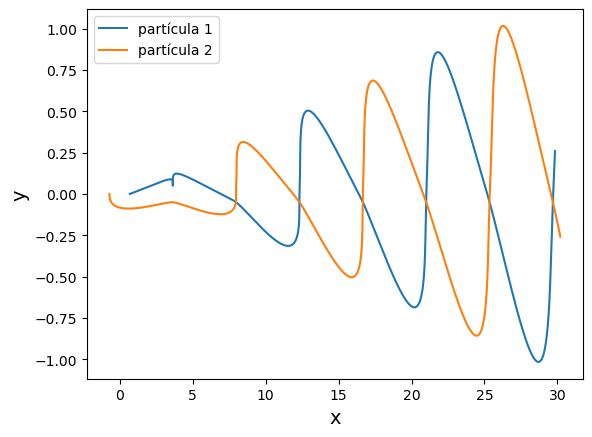

In [63]:
plt.plot(x1,y1, label = "partícula 1")
plt.plot(x2,y2, label = "partícula 2")
plt.xlabel('x',fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend(loc = 'best')
plt.show()

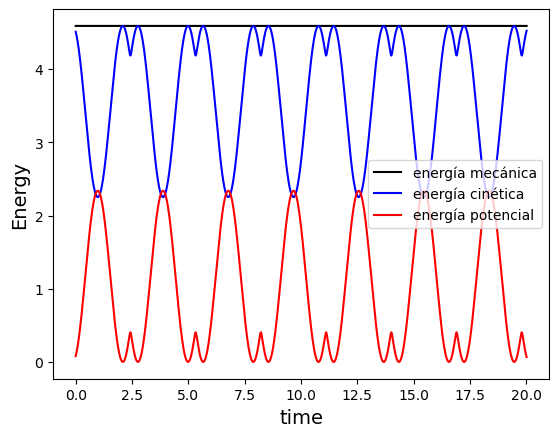

In [64]:
plt.plot(t,E1, color ='black', label = "energía mecánica")
plt.plot(t,K,  color='blue',label = "energía cinética")
plt.plot(t,U,  color='red',label = "energía potencial")

plt.xlabel('time',fontsize=14)
plt.ylabel('Energy', fontsize=14)


plt.legend(loc = 'best')
plt.show()

f) 
La gráfica anterior muestra la variación de la energía mecánica, cinética y potencial con respecto al tiempo. La energía mecánica es casi constante a lo largo del tiempo, esta es la suma de la energía cinética y potencial, indicando que con variaciones de 1*10^-11, como se ve en la segunda gráfica (abajo), la variación de energía mecánica es casi cero. 

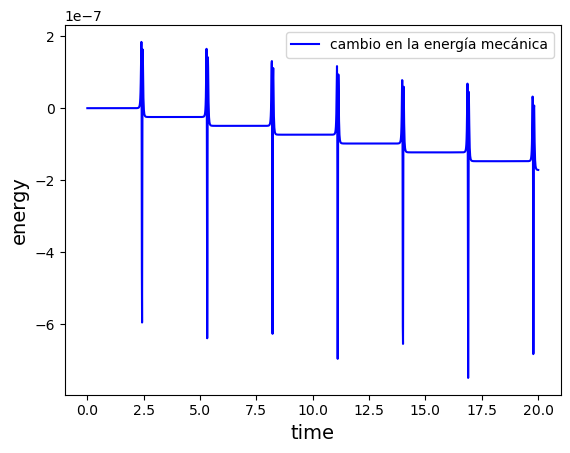

In [65]:
plt.plot(t,E1-E1[0], color='blue', label= 'cambio en la energía mecánica')

plt.xlabel('time', fontsize=14)
plt.ylabel('energy', fontsize=14)
plt.legend(loc = 'best')
plt.show()

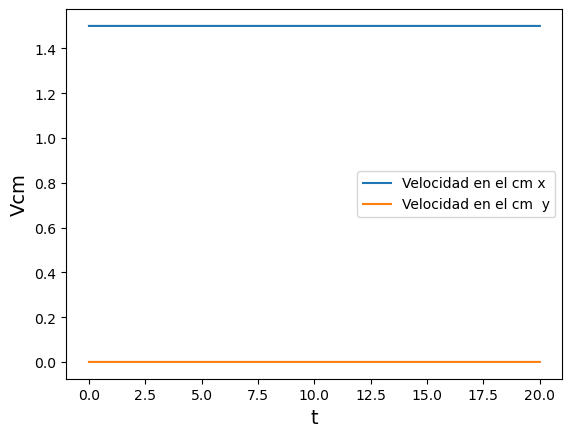

In [66]:
plt.plot(t,Velcmx, label = "Velocidad en el cm x")
plt.plot(t,Velcmy, label = "Velocidad en el cm  y")
plt.xlabel('t',fontsize=14)
plt.ylabel('Vcm', fontsize=14)
plt.legend(loc = 'best')
plt.show()


g) Con las condiciones iniciales dadas el centro de masa es estatico por lo que su velocidad es 0 como se puede ver en la gráfica. Esto se cumple ya que las condiciones iniciales son equivalentes para ambos lados, es decir, para las dos particulas pero lados opuestos, creando un equilibrio en el centro de masa que lo mantiene estático.

In [67]:
L[0]

0.27999999999999997

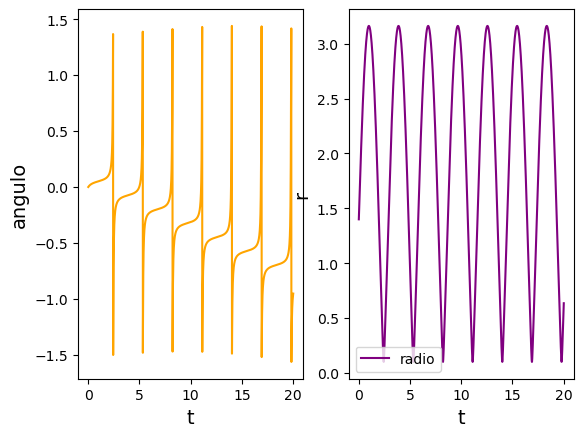

In [68]:

plt.subplot(1,2,1)
plt.plot(t,angulo, color='orange',label = "ángulo")
plt.xlabel('t',fontsize=14)
plt.ylabel('angulo', fontsize=14)
plt.subplot(1,2,2)
plt.plot(t,r, color='purple',label = "radio")
plt.xlabel('t',fontsize=14)
plt.ylabel('r', fontsize=14)
plt.legend(loc = 'best')
plt.show()

i), j) Sí es posible extraer el periodo y la frecuencia a partir de las gráficas anteriores. Observamos que la distancia entre las partículas con respecto al tiempo, oscila de manera periódica debido a las condiciones iniciales de ambas partículas. El periodo de rotación (estimado de manera cualitativa) es de casi 10 unidades, mientras que el de oscilación es de aproxiamadamente 5 unidades. 

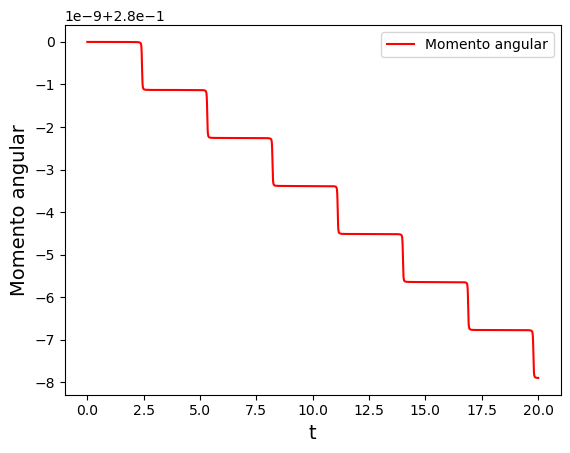

In [69]:
plt.plot(t,L,color='red',label = "Momento angular")
plt.xlabel('t',fontsize=14)
plt.ylabel('Momento angular', fontsize=14)
plt.legend(loc = 'best')
plt.show()

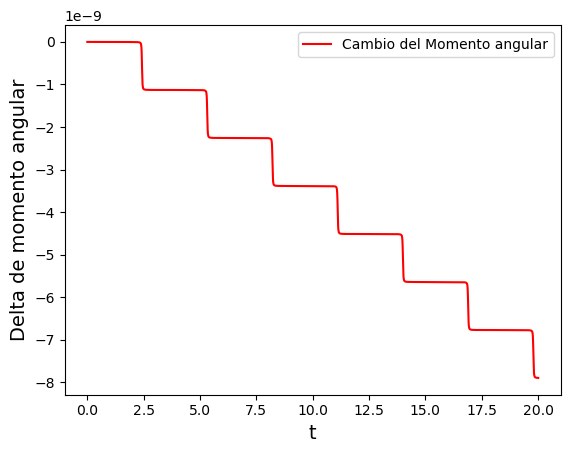

In [70]:
plt.plot(t,L-L[0],color='red',label = "Cambio del Momento angular")
plt.xlabel('t',fontsize=14)
plt.ylabel('Delta de momento angular', fontsize=14)
plt.legend(loc = 'best')
plt.show()

h) Se observa que la variación en el momento angular que muestra la gráfica es creciente, sin embargo es del orden de 10^-12 por lo que es un cambio tan pequeño que se podría decir que prácticamente se conserva. Esto sucede porque este sistema es un sistema de fuerza central dónde el momento se conserva y por consecuencia, el movimiento es planar. 

# Potencial efectivo

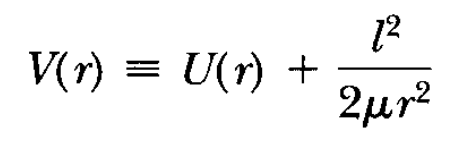

In [71]:
def Pot_ef(u,w,l0, momento_angular):
    l=np.sqrt((u[:,4]-u[:,0])**2+(u[:,6]-u[:,2])**2)
    U=(1/2)*(w)*((l-l0)**2)
    
    V= U+ (momento_angular**2)/(2*l**2)
    return V



In [72]:
m = runge_kutta_4to(resorte,u0,t,w,l0)

V=  Pot_ef(m,w,l0,L)
print(V)

print(np.min(V))

[0.1        0.11160368 0.1241193  ... 0.20802655 0.18459925 0.16351959]
0.036673559557829485


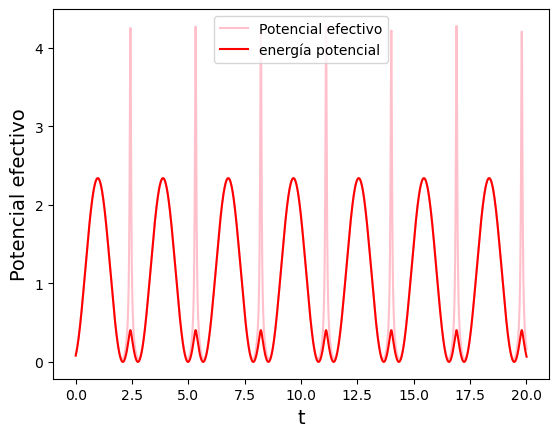

In [73]:
plt.plot(t,V,color='pink',label = "Potencial efectivo")
plt.plot(t,U,  color='red',label = "energía potencial")
plt.xlabel('t',fontsize=14)
plt.ylabel('Potencial efectivo', fontsize=14)
plt.legend(loc = 'best')
plt.show()

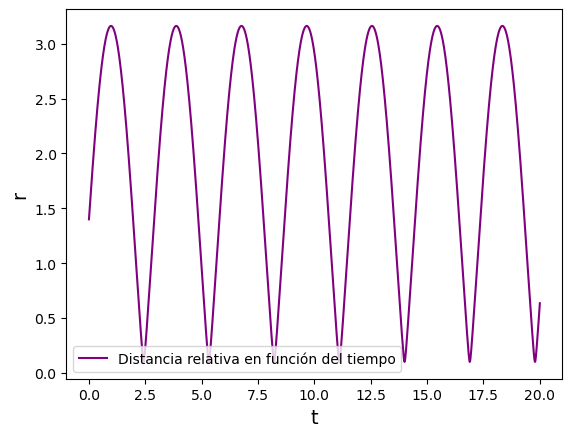

In [74]:
plt.plot(t,r, color='purple',label = "Distancia relativa en función del tiempo")
plt.xlabel('t',fontsize=14)
plt.ylabel('r', fontsize=14)
plt.legend(loc = 'best')
plt.show()

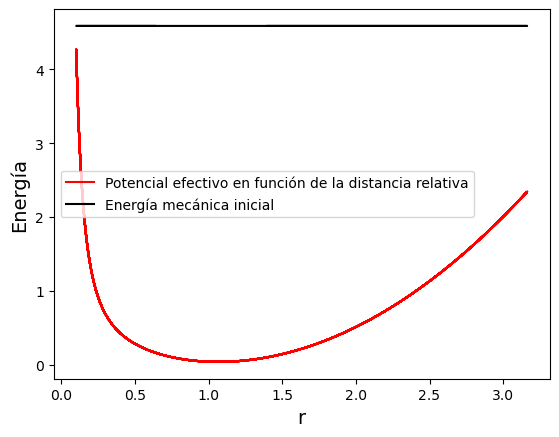

In [75]:
plt.plot(r,V,color='red',label = "Potencial efectivo en función de la distancia relativa")
plt.plot(r,E1,color='black',label = "Energía mecánica inicial")

plt.xlabel('r',fontsize=14)
plt.ylabel('Energía', fontsize=14)
plt.legend(loc = 'best')
plt.show()